### Prediction of Loan Fallout
#### FRE 9733 - Homework 5
#### Deniz Kural - dk3703


1.Load “Lesson5_HW_Loan_FallOut_Prediction.csv” into R or Python <br> 
2.Check on data quality & completeness <br> 
3.Process & transform data if needed <br> 
4.Choose three classifiers to build from the following options:<br> 
    &emsp;&emsp;Naïve Bayesian<br> 
    &emsp;&emsp;Decision Tree<br> 
    &emsp;&emsp;SVM<br> 
    &emsp;&emsp;Logistic Regression<br> 
5.Compare the model performance by ROC, Precision, Recall, and F-Score<br> 
6.Conduct cross validation<br> 
7.Summarize your finding into a brief report

In [1]:
#Step 1
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn import model_selection
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
import seaborn as sn
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import f1_score, precision_score, recall_score, fbeta_score
from sklearn.metrics import confusion_matrix, accuracy_score 
from sklearn import metrics
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression




In [2]:
#Import the dataset
df= pd.read_csv("/Users/denizkuraal/Downloads/Lesson5_Loan_FallOut_Prediction.csv")

In [3]:
df.head()

,APPLICATION_NUM,AGE,SCHOOLING,GENDER,MARITAL,OCCUPY,DEPEND,BORROWER_CREDIT_SCORE,JUDGEMENTS,BANKRUPTCY,FORECLOSURE,LAWSUIT,ALIMONY,VETERAN,PAST_LOAN,INITIAL_RATE,FALLOUT_FLAG
0,1234567,62,14,Male,Married,Y,0,645.0,N,N,N,N,N,Y,N,4.25,0
1,1234568,71,12,Male,Married,Y,0,778.0,N,N,N,N,N,Y,N,4.99,0
2,1234569,28,16,Male,Married,Y,1,677.0,N,N,N,N,N,Y,N,4.49,0
3,1234570,62,20,Male,Married,Y,0,677.0,N,N,N,N,N,Y,N,4.25,0
4,1234571,38,12,Not provided by phone/mail app,Unmarried,Y,0,602.0,N,N,N,N,N,Y,N,4.25,0


In [4]:
#Step 2
#Data Quality and Completeness

df.columns

Index(['APPLICATION_NUM', 'AGE', 'SCHOOLING', 'GENDER', 'MARITAL', 'OCCUPY',
       'DEPEND', 'BORROWER_CREDIT_SCORE', 'JUDGEMENTS', 'BANKRUPTCY',
       'FORECLOSURE', 'LAWSUIT', 'ALIMONY', 'VETERAN', 'PAST_LOAN',
       'INITIAL_RATE', 'FALLOUT_FLAG'],
      dtype='object')

In [5]:
df.describe()

,APPLICATION_NUM,AGE,SCHOOLING,DEPEND,BORROWER_CREDIT_SCORE,INITIAL_RATE,FALLOUT_FLAG
count,5.805000e+04,58050.000000,58050.000000,58050.000000,39995.000000,58050.000000,58050.000000
mean,1.263592e+06,50.630922,12.686856,0.624410,678.596075,4.057728,0.445237
std,1.675774e+04,14.290258,5.070245,1.303502,77.158999,0.323058,0.496996
min,1.234567e+06,0.000000,0.000000,0.000000,100.000000,2.250000,0.000000
25%,1.249079e+06,39.000000,12.000000,0.000000,630.000000,3.750000,0.000000
50%,1.263592e+06,50.000000,14.000000,0.000000,682.000000,3.990000,0.000000
75%,1.278104e+06,62.000000,16.000000,1.000000,736.000000,4.250000,1.000000
max,1.292616e+06,114.000000,35.000000,92.000000,833.000000,5.000000,1.000000


In [6]:
#Display data types of the dataset
df.dtypes

APPLICATION_NUM            int64
AGE                        int64
SCHOOLING                  int64
GENDER                    object
MARITAL                   object
OCCUPY                    object
DEPEND                     int64
BORROWER_CREDIT_SCORE    float64
JUDGEMENTS                object
BANKRUPTCY                object
FORECLOSURE               object
LAWSUIT                   object
ALIMONY                   object
VETERAN                   object
PAST_LOAN                 object
INITIAL_RATE             float64
FALLOUT_FLAG               int64
dtype: object

In [7]:
#Display the categorical vs. numerical variables
df.columns.to_series().groupby(df.dtypes).groups

{int64: ['APPLICATION_NUM', 'AGE', 'SCHOOLING', 'DEPEND', 'FALLOUT_FLAG'], float64: ['BORROWER_CREDIT_SCORE', 'INITIAL_RATE'], object: ['GENDER', 'MARITAL', 'OCCUPY', 'JUDGEMENTS', 'BANKRUPTCY', 'FORECLOSURE', 'LAWSUIT', 'ALIMONY', 'VETERAN', 'PAST_LOAN']}

##### Object variables should be handled before processing into model built and evaluation stage.These are: <br>
<b>object</b>: ['GENDER', 'MARITAL', 'OCCUPY', 'JUDGEMENTS', 'BANKRUPTCY', 'FORECLOSURE', 'LAWSUIT', 'ALIMONY', 'VETERAN', 'PAST_LOAN']



In [8]:
#Data Completeness
#Get the info. for both missing values in each column and also type of variables in each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58050 entries, 0 to 58049
Data columns (total 17 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   APPLICATION_NUM        58050 non-null  int64  
 1   AGE                    58050 non-null  int64  
 2   SCHOOLING              58050 non-null  int64  
 3   GENDER                 58050 non-null  object 
 4   MARITAL                58044 non-null  object 
 5   OCCUPY                 58050 non-null  object 
 6   DEPEND                 58050 non-null  int64  
 7   BORROWER_CREDIT_SCORE  39995 non-null  float64
 8   JUDGEMENTS             58050 non-null  object 
 9   BANKRUPTCY             58050 non-null  object 
 10  FORECLOSURE            58050 non-null  object 
 11  LAWSUIT                58050 non-null  object 
 12  ALIMONY                58050 non-null  object 
 13  VETERAN                50426 non-null  object 
 14  PAST_LOAN              58050 non-null  object 
 15  IN

In [9]:
#Display the columns with missing variables if any
df.isna().any()

APPLICATION_NUM          False
AGE                      False
SCHOOLING                False
GENDER                   False
MARITAL                   True
OCCUPY                   False
DEPEND                   False
BORROWER_CREDIT_SCORE     True
JUDGEMENTS               False
BANKRUPTCY               False
FORECLOSURE              False
LAWSUIT                  False
ALIMONY                  False
VETERAN                   True
PAST_LOAN                False
INITIAL_RATE             False
FALLOUT_FLAG             False
dtype: bool

As we can see from the above results, "MARITAL","BORROWER_CREDIT_SCORE","VETERAN" has some missing values. 

Let's draw some graphs versus fallout_flag which is a response variable for us. 
So, it is logical to think that credit score and age of borrower could be effective for loan fallout.
Let's observe this situations in a bar plot.

Text(0.5, 0, 'Fallout')

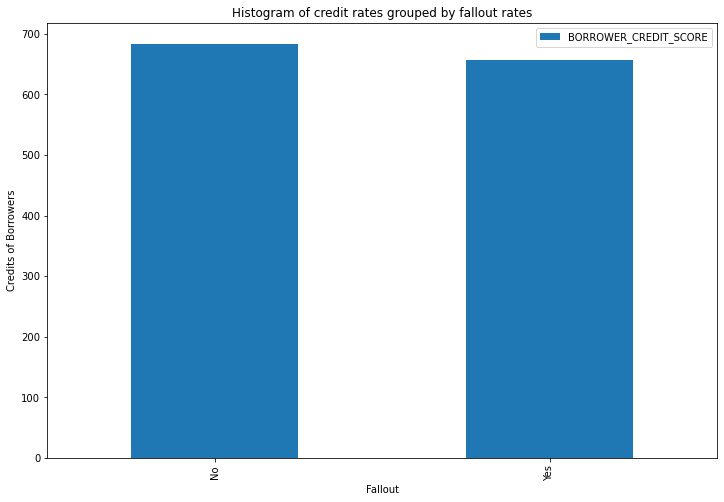

In [10]:
#Plot histograms of “Credit score” group by “fallout”
df2 = df.dropna(subset=['BORROWER_CREDIT_SCORE'])
credit_by_fallout=df2[['BORROWER_CREDIT_SCORE','FALLOUT_FLAG']]
credit_hist=credit_by_fallout.groupby(by='FALLOUT_FLAG').mean()
credit_hist=credit_hist.set_index([pd.Index(['No','Yes'])])
ax=credit_hist.plot.bar(title="Histogram of credit rates grouped by fallout rates",legend=True,grid=False,figsize =(12, 8))
plt.ylabel('Credits of Borrowers')
plt.xlabel('Fallout')

Text(0.5, 0, 'Fallout')

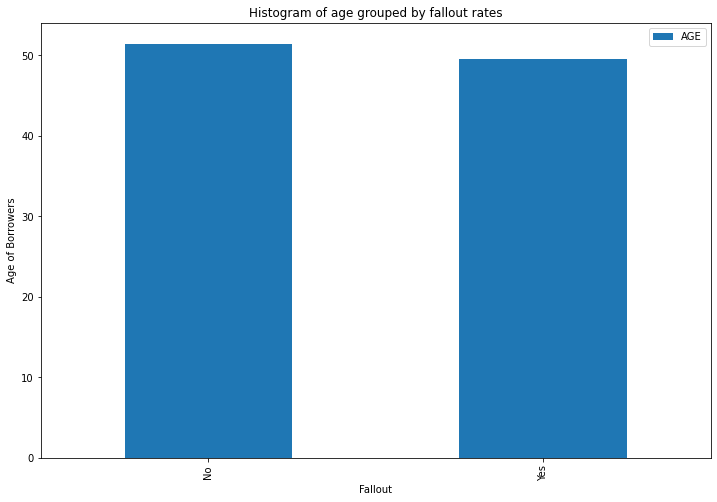

In [11]:
#Plot histograms of “age” group by “fallout”
age_by_fallout=df[['AGE','FALLOUT_FLAG']]
age_hist=age_by_fallout.groupby(by='FALLOUT_FLAG').mean()
age_hist=age_hist.set_index([pd.Index(['No','Yes'])])
ax=age_hist.plot.bar(title="Histogram of age grouped by fallout rates",legend=True,grid=False,figsize =(12, 8))
plt.ylabel('Age of Borrowers')
plt.xlabel('Fallout')

We can see from these plots that the average age and customer credit of no loan fallout rate is a bit higher than average age and customer credit of the borrower's with loan fallout. This can be observed numerically as following,

In [12]:
credit_hist

,BORROWER_CREDIT_SCORE
No,683.897062
Yes,656.684508


In [13]:
age_hist

,AGE
No,51.474165
Yes,49.580245


<AxesSubplot:>

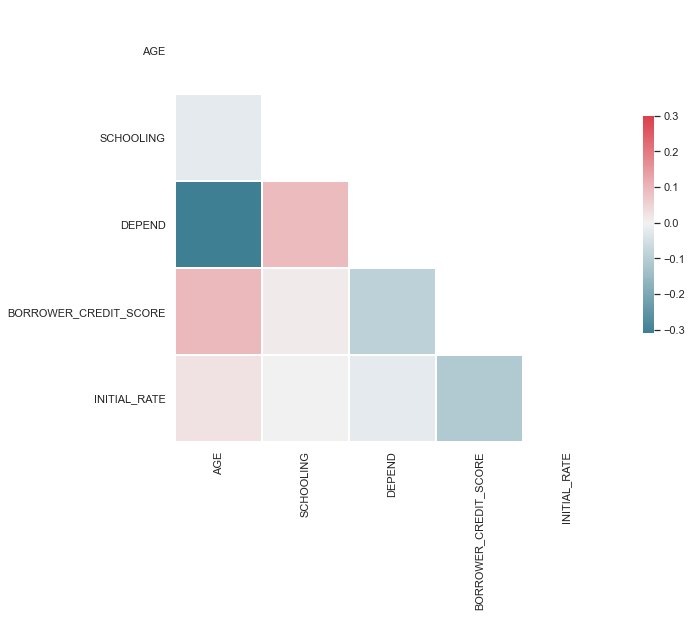

In [14]:
#Let's see the correlations among variables.
#We can also display the correlation matrix in order to observer collinearity between predictors.
#Set and compute the Correlation Matrix:
sn.set(style="white")
df_corr=df.drop(['APPLICATION_NUM','FALLOUT_FLAG'],axis=1)
corr = df_corr.corr()

#Generate a mask for the upper triangle:
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

#Set up the matplotlib figure and a diverging colormap:
f, ax = plt.subplots(figsize=(12, 8))
cmap = sn.diverging_palette(220, 10, as_cmap=True)
#Draw the heatmap with the mask and correct aspect ratio:
sn.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
square=True, linewidths=.5, cbar_kws={"shrink": .5})

#### We only seem to get considerable correlation between "Schooling and Depend" and also between "Age and Borrower Credit Score"

In [15]:
#Amount of missing data per variable
print(df.isnull().sum())

APPLICATION_NUM              0
AGE                          0
SCHOOLING                    0
GENDER                       0
MARITAL                      6
OCCUPY                       0
DEPEND                       0
BORROWER_CREDIT_SCORE    18055
JUDGEMENTS                   0
BANKRUPTCY                   0
FORECLOSURE                  0
LAWSUIT                      0
ALIMONY                      0
VETERAN                   7624
PAST_LOAN                    0
INITIAL_RATE                 0
FALLOUT_FLAG                 0
dtype: int64


In [16]:
df['BORROWER_CREDIT_SCORE'].describe()

count    39995.000000
mean       678.596075
std         77.158999
min        100.000000
25%        630.000000
50%        682.000000
75%        736.000000
max        833.000000
Name: BORROWER_CREDIT_SCORE, dtype: float64

As can be seen from the description of borrower's credit score, we have a significant standard deviation over its mean. Methods such as imputation with mean, or interpolatation could be dangerous as it is not correct to replace important feature with a really high deviation. So, we will remove the rows with missing value.

In [17]:
df.dropna(inplace=True)

In [18]:
print(df.isnull().sum())

APPLICATION_NUM          0
AGE                      0
SCHOOLING                0
GENDER                   0
MARITAL                  0
OCCUPY                   0
DEPEND                   0
BORROWER_CREDIT_SCORE    0
JUDGEMENTS               0
BANKRUPTCY               0
FORECLOSURE              0
LAWSUIT                  0
ALIMONY                  0
VETERAN                  0
PAST_LOAN                0
INITIAL_RATE             0
FALLOUT_FLAG             0
dtype: int64


In [19]:
#Create label encoder for feature with less than or equal to 2  unique values
#Create a label encoder object
le = LabelEncoder()
# Label Encoding will be used for columns with 2 or less unique values
le_count = 0

for col in df.columns[1:]:
    if df[col].dtype == 'object':
        print(col)
        if len(list(df[col].unique())) <= 2:
            le.fit(df[col])
            df[col] = le.transform(df[col])
            le_count += 1
            
print('{} columns were label encoded.'.format(le_count))

GENDER
MARITAL
OCCUPY
JUDGEMENTS
BANKRUPTCY
FORECLOSURE
LAWSUIT
ALIMONY
VETERAN
PAST_LOAN
8 columns were label encoded.


In [20]:
#For larger than 2 unique values ,we need to create dummies.
#APPLICATION_NUM is an object and we do not want to get dummies for APPLICATION_NUM 
identity = df["APPLICATION_NUM"]
df = df.drop(columns="APPLICATION_NUM")

df= pd.get_dummies(df)

df = pd.concat([df, identity], axis = 1)

In [21]:
#Identify response variable (FALLOUT_FLAG):
    
response = df["FALLOUT_FLAG"]
df = df.drop(columns="FALLOUT_FLAG")

In [22]:
# Split the dataset into training and validation sets
X_train, X_test, y_train, y_test = train_test_split(df , response,test_size=0.20, random_state=1)

In [23]:
print("Number transactions X_train dataset: ", X_train.shape)
print("Number transactions X_test dataset: ", X_test.shape)
print("Number transactions y_train dataset: ", y_train.shape)
print("Number transactions y_test dataset: ", y_test.shape)

Number transactions X_train dataset:  (29483, 20)
Number transactions X_test dataset:  (7371, 20)
Number transactions y_train dataset:  (29483,)
Number transactions y_test dataset:  (7371,)


In [24]:
train_id = X_train['APPLICATION_NUM']
X_train = X_train.drop(columns = ['APPLICATION_NUM'])

test_id = X_test['APPLICATION_NUM']
X_test = X_test.drop(columns = ['APPLICATION_NUM'])

### First Model : Logistic Regression


In [25]:
#Normalization
sc_X = StandardScaler()

X_train2 = pd.DataFrame(sc_X.fit_transform(X_train))
X_train2.columns = X_train.columns.values
X_train2.index = X_train.index.values
X_train = X_train2

X_test2 = pd.DataFrame(sc_X.transform(X_test))
X_test2.columns = X_test.columns.values
X_test2.index = X_test.index.values
X_test = X_test2

In [26]:
#Model Implementation "Logistic Regression"
model = LogisticRegression(solver= 'liblinear')

In [27]:
#Test your model performance
#Calculate precision, recall, F1-Score, ROC 
#Plot the ROC and precision-recall curves

# Fitting Logistic Regression to the Training set
model.fit(X_train, y_train)
# Predicting the Test set results
y_pred = model.predict(X_test)
#Evaluate results
acc = accuracy_score(y_test, y_pred )
prec = precision_score(y_test, y_pred )
rec = recall_score(y_test, y_pred )
f1 = f1_score(y_test, y_pred )
f2 = fbeta_score(y_test, y_pred, beta=2.0)


results = pd.DataFrame([['Logistic Regression', 
acc, prec, rec, f1, f2]], columns = ['Model', 
'Accuracy', 'Precision', 'Recall', 'F1 Score', 
'F2 Score'])
results = results.sort_values(["Precision", 
"Recall", "F2 Score"], ascending = False)
print (results)

                 Model  Accuracy  Precision   Recall  F1 Score  F2 Score
0  Logistic Regression  0.834622   0.712121  0.03769  0.071592  0.046498


Text(0.5, 12.5, 'Predicted label\n')

<Figure size 2016x1440 with 0 Axes>

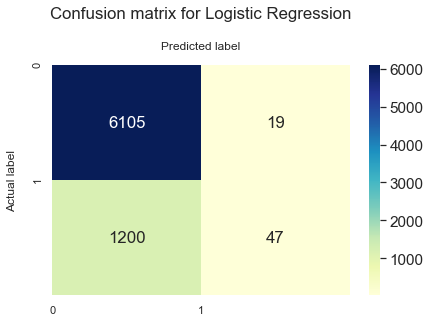

In [28]:
cm = confusion_matrix(y_test, y_pred) 
df_cm = pd.DataFrame(cm, index = (0, 1), columns = (0, 1))
plt.figure(figsize = (28,20))
fig, ax = plt.subplots()
sn.set(font_scale=1.4)
sn.heatmap(df_cm, annot=True, fmt='g',cmap="YlGnBu" )
class_names=[0,1]
tick_marks = np.arange(len(class_names))
plt.tight_layout()
plt.title('Confusion matrix for Logistic Regression\n', y=1.1)
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
ax.xaxis.set_label_position("top")
plt.ylabel('Actual label\n')
plt.xlabel('Predicted label\n')

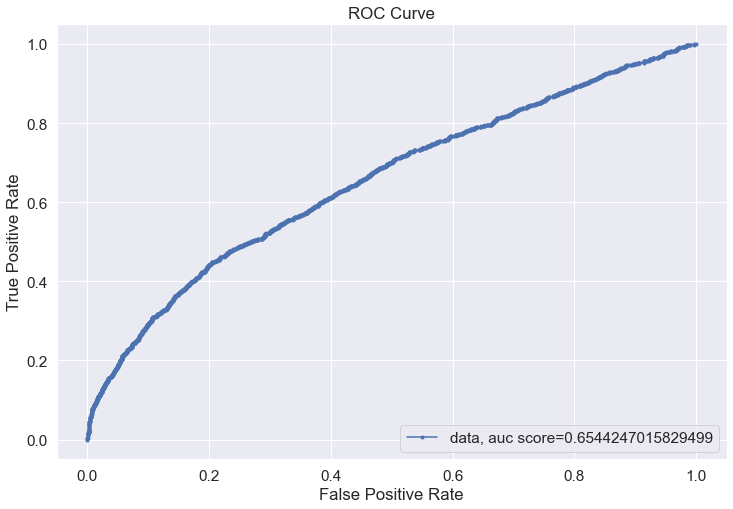

In [29]:
#AUC Curve

y_pred_proba = model.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
fig, ax = plt.subplots(figsize=(12, 8))
ax.plot(fpr,tpr,label="data, auc score="+str(auc),marker='.')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc=4)
plt.show()

## Analysis of Results for Logistic Regression

First, let's analyze the scores that we get for Logistic Regression Model. We can see that accuracy of the model 0.834622 which is quite good but we need to analyze other metrics such as precision and recall. If we look at them, we can see that although precision (True Predicted Positive rate) is high, the recall that is true positive rate is really low. This is concerning for our model's needs. **Our model is to predict loan fallouts and in a loan fallout , we want really low false negative rates. This is due to fact that false negatives indicate the loans that is tagged as fallout but our model is predicted it as non loan fallout.** This is not desired from the companys that issue loans as they give huge importance to correctly identify the loans with higher possibilty of fallout. However, they do not give so much importance to FP that is healthy loans but predicted as loan fallout from our model. **Thus, we desire the FNs to be as much low as possible.** So, we can say that the results is not that great and the model is not great for our purposes although it provides accurate results. F1 score also indicates and supports this result as it is low.  <br>
If we look at the ROC curve, Area under the curve is approximately 0.65 which indicates a bad AUC score because a base model where we can say "no classifier" has 0.5 score. We would like to get a significant TP rate and low FP rate for a good model. This result does not show that.


### Second Model: Naive Bayes 

In [30]:
#Create a Gaussian Classifier
gnb = GaussianNB()

#Train the model using the training sets
gnb.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = gnb.predict(X_test)

In [31]:
#Evaluate results
acc = accuracy_score(y_test, y_pred )
prec = precision_score(y_test, y_pred )
rec = recall_score(y_test, y_pred )
f1 = f1_score(y_test, y_pred )
f2 = fbeta_score(y_test, y_pred, beta=2.0)
results.loc[len(results.index)]=['Naive Bayes', 
acc, prec, rec, f1, f2]
print(results)

                 Model  Accuracy  Precision    Recall  F1 Score  F2 Score
0  Logistic Regression  0.834622   0.712121  0.037690  0.071592  0.046498
1          Naive Bayes  0.803826   0.363136  0.211708  0.267477  0.230971


Text(0.5, 8.5, 'Predicted label\n')

<Figure size 2016x1440 with 0 Axes>

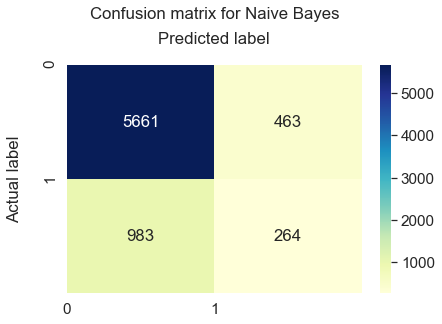

In [32]:
#Confusion Matrix

cm = confusion_matrix(y_test, y_pred) 
df_cm = pd.DataFrame(cm, index = (0, 1), columns = (0, 1))
plt.figure(figsize = (28,20))
fig, ax = plt.subplots()
sn.set(font_scale=1.4)
sn.heatmap(df_cm, annot=True, fmt='g',cmap="YlGnBu" )
class_names=[0,1]
tick_marks = np.arange(len(class_names))
plt.tight_layout()
plt.title('Confusion matrix for Naive Bayes\n', y=1.1)
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
ax.xaxis.set_label_position("top")
plt.ylabel('Actual label\n')
plt.xlabel('Predicted label\n')

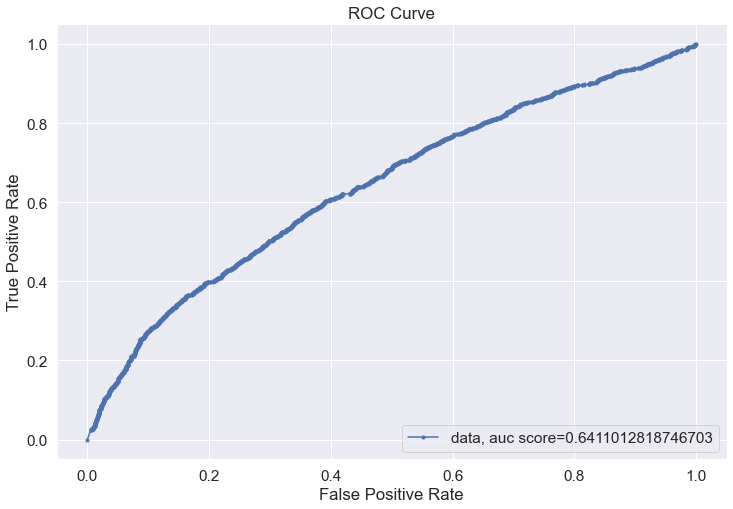

In [33]:
#AUC Curve

y_pred_proba = gnb.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
fig, ax = plt.subplots(figsize=(12, 8))
ax.plot(fpr,tpr,label="data, auc score="+str(auc),marker='.')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc=4)
plt.show()

## Analysis of Results for Naive Bayes Model

Naive Bayes model provides worse accuracy if you compare it with Logistic regression model. However, this does not mean that naive bayes model is worse than logistic regression. If we look at the recall and precision scores, we can clearly see that while we lose some considerable precison score, we increase recall score significantly. Moreover, F1 and F2 score is also increased significantly where they are useful for unbalanced datasets and could be said that averaging or balanced score of recall and precision. So, as False Negatives are crucial for us, we can say that Naive Bayes is better than logistic regression in our case.  <br>
AUC score is got lower slightly if we compare it with logistic regression and the ROC curve seems really similar to logistic regression ROC curve.


### Third Model: Decision Trees

In [34]:
dtree= DecisionTreeClassifier(max_leaf_nodes=3)

dtree.fit(X_train,y_train)
y_pred= dtree.predict(X_test)


In [35]:
#Evaluate results
acc = accuracy_score(y_test, y_pred )
prec = precision_score(y_test, y_pred )
rec = recall_score(y_test, y_pred )
f1 = f1_score(y_test, y_pred )
f2 = fbeta_score(y_test, y_pred, beta=2.0)
results.loc[len(results.index)]=['Decision Tree', 
acc, prec, rec, f1, f2]
print(results)

                 Model  Accuracy  Precision    Recall  F1 Score  F2 Score
0  Logistic Regression  0.834622   0.712121  0.037690  0.071592  0.046498
1          Naive Bayes  0.803826   0.363136  0.211708  0.267477  0.230971
2        Decision Tree  0.837336   0.700000  0.067362  0.122897  0.082224


Text(0.5, 8.5, 'Predicted label\n')

<Figure size 2016x1440 with 0 Axes>

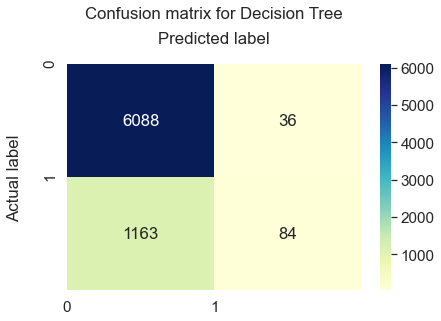

In [36]:
#Confusion Matrix

cm = confusion_matrix(y_test, y_pred) 
df_cm = pd.DataFrame(cm, index = (0, 1), columns = (0, 1))
plt.figure(figsize = (28,20))
fig, ax = plt.subplots()
sn.set(font_scale=1.4)
sn.heatmap(df_cm, annot=True, fmt='g',cmap="YlGnBu" )
class_names=[0,1]
tick_marks = np.arange(len(class_names))
plt.tight_layout()
plt.title('Confusion matrix for Decision Tree\n', y=1.1)
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
ax.xaxis.set_label_position("top")
plt.ylabel('Actual label\n')
plt.xlabel('Predicted label\n')

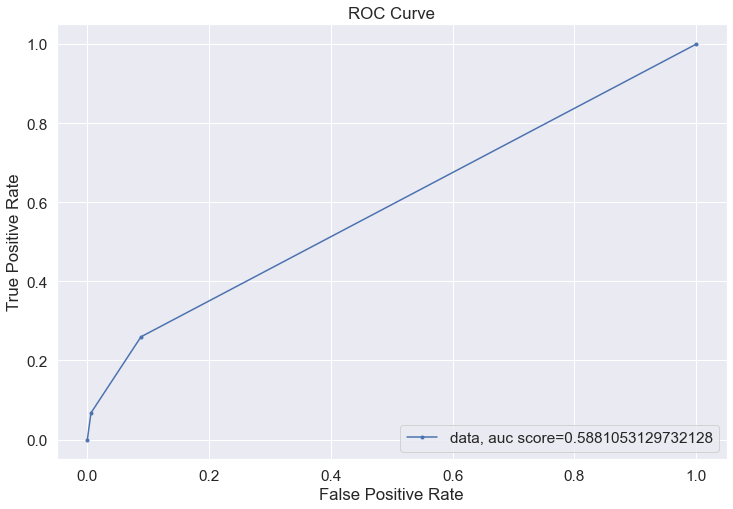

In [37]:
#AUC Curve

y_pred_proba = dtree.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
fig, ax = plt.subplots(figsize=(12, 8))
ax.plot(fpr,tpr,label="data, auc score="+str(auc),marker='.')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc=4)
plt.show()

## Analysis of Results for Decision Tree Model

If we look at the results that we got for decision tree model, we can see that its performance is in between Naive Bayes and logistic regression. Both the recall and precision values are in between logistic regression and naive bayes. The positive side of this model is higher accuracy that we got in comparison to others, which is slightly better than logistic regression's accuracy. The interesting result here is that auc score is really low if we compare it with other models. This is a good indicator for a good classifier model which in this case, we can conclude that the decision tree model is not that good for modelling loan fallout dataset.

### Conduct a K-fold cross validation 

In [38]:
kfold = model_selection.KFold(n_splits=10, random_state=None)

In [39]:
#Interpret the result

def result_CV(model,xset,yset,cvmodel,model_name):
    result = cross_val_score(model , xset, yset, cv = cvmodel)
    print("Avg accuracy of " ,model_name, ": {}".format(result.mean()))
    # roc_auc scoring  by cross-validation:
    cv_auc_results = model_selection.cross_val_score(  
    model, X_train, y_train, cv=kfold, scoring='roc_auc')
    print("Avg Roc AUC score of Logistic Regression: {}".format(cv_auc_results.mean()))

In [40]:
result_CV(model,X_train, y_train, kfold,"Logistic Regression")

Avg accuracy of  Logistic Regression : 0.8352610617494236
Avg Roc AUC score of Logistic Regression: 0.6498715834239153


In [41]:
result_CV(gnb,X_train, y_train, kfold,"Naive Bayes")

Avg accuracy of  Naive Bayes : 0.8069740426692948
Avg Roc AUC score of Logistic Regression: 0.6390424564851431


In [42]:
result_CV(dtree,X_train, y_train, kfold,"Decision Tree")

Avg accuracy of  Decision Tree : 0.8378048948819206
Avg Roc AUC score of Logistic Regression: 0.5888064175777006


Let's analyze the results of three models. We can observe similarities with results we got without cross validation. So, decision tree is again the most accurate modle among these three models. However, this time logistic regressions AUC score is the highest which indicates that it is has the highest (true positive rate / false positive rate) which is an indication of a better classification model. As teh False negatives are more imprtant in our case and by looking overall performance of three models form CV scores, logistic regression seems as the best model among these three models.

### Comments about the Results


In [43]:
#Let's observe the fallout rate calculation with logistic regression model's predicted probabilities for each customer in the database.
final_results = pd.concat([test_id, y_test], axis = 1).dropna()
#probability score
y_pred_probs = model.predict_proba(X_test)
y_pred_probs  = y_pred_probs [:, 1]

final_results['predictions'] = y_pred
final_results["fallout_rate(%)"] = y_pred_probs
final_results["fallout_rate(%)"] = final_results["fallout_rate(%)"]*100
final_results["fallout_rate(%)"]=final_results["fallout_rate(%)"].round(2)
final_results = final_results[['APPLICATION_NUM', 'FALLOUT_FLAG', 'predictions', 'fallout_rate(%)']]
final_results ['Ranking'] = pd.qcut(final_results['fallout_rate(%)'].rank(method = 'first'),10,labels=range(10,0,-1))
print (final_results)

       APPLICATION_NUM  FALLOUT_FLAG  predictions  fallout_rate(%) Ranking
14386          1248953             0            0            10.27       9
31869          1266436             0            0             9.82       9
14005          1248572             0            0            21.29       2
46007          1280574             1            0            11.40       8
2393           1236960             0            0             8.65      10
...                ...           ...          ...              ...     ...
4195           1238762             0            0            22.33       2
19191          1253758             0            0            11.52       8
26214          1260781             0            0            12.00       7
8264           1242831             0            0            17.98       3
1991           1236558             0            0            24.42       2

[7371 rows x 5 columns]


In [44]:
sort_by_ranking=final_results.sort_values('fallout_rate(%)',ascending=False)
sort_by_ranking.head(10)

,APPLICATION_NUM,FALLOUT_FLAG,predictions,fallout_rate(%),Ranking
34198,1268765,1,1,90.10,1
43642,1278209,1,0,84.76,1
36111,1270678,1,1,84.30,1
34547,1269114,1,1,82.91,1
53978,1288545,1,1,79.99,1
36150,1270717,1,0,77.66,1
5657,1240224,0,0,75.42,1
1480,1236047,0,0,67.31,1
38756,1273323,1,0,66.65,1
49424,1283991,1,1,66.46,1


If we sort the each customer with most likely to fallout, we can see some interesting results. Our algorithm does not predict fallout for some applications with fallout flag and also highly outcome of fallout as we can see from the %s. This shows us that indeed, our model is not that strong and there could be better models.

In [45]:
sort_by_ranking=final_results.sort_values('fallout_rate(%)',ascending=True)
sort_by_ranking.head(10)

,APPLICATION_NUM,FALLOUT_FLAG,predictions,fallout_rate(%),Ranking
21537,1256104,0,0,4.76,10
28858,1263425,0,0,5.19,10
28477,1263044,0,0,5.39,10
15402,1249969,0,0,5.84,10
30773,1265340,0,0,5.88,10
23206,1257773,0,0,5.93,10
26036,1260603,0,0,5.96,10
30912,1265479,0,0,6.00,10
30319,1264886,0,0,6.11,10
31905,1266472,0,0,6.15,10


We do not see same issue for no fallouts as we can see all match from above table. It seems that algortihm works better for decisions of no fallout.